In [1]:
# We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

## 1. Load the dataset and explore the variables.

In [2]:
#import libraries
import imblearn
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Read the file into python as dataframe
df = pd.read_csv('files_for_lab/customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# shape of the dataframe
df.shape

(7043, 21)

In [5]:
# Show the dataframe's column names in a list 
list(df.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [6]:
# type of each column
df.dtypes
# df.info()

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# description of the dataframe (numerical columns)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#some data cleaning
# checking null values
df.isna().sum()
# there are no null, Nan values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#Standardize header-column names in the dataframe using only lowercase letters and replacing the spaces with underscores
cols = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))]
cols
df.columns=cols
list(df.columns)

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [10]:
# renaming columns
df = df.rename(columns={'customerid' : 'customer_id',
'seniorcitizen' : 'senior_citizen',
 'phoneservice' : 'phone_service',
 'multiplelines' : 'multiple_lines',
 'internetservice' :  'internet_service',
 'onlinesecurity' : 'online_security',
 'onlinebackup' : 'online_backup',
 'deviceprotection' : 'device_protection',
 'techsupport' : 'tech_support',
 'streamingtv' : 'streaming_tv',
 'streamingmovies' :  'streaming_movies',
 'paperlessbilling' : 'paperless_billing',
 'paymentmethod' :'payment_method',
 'monthlycharges' :'monthly_charges',
 'totalcharges': 'total_charges'
})
list(df.columns)

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'churn']

In [11]:
# categorical columns
df.select_dtypes(['object']).columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'total_charges', 'churn'],
      dtype='object')

In [12]:
# numerical columns
df.select_dtypes(include=[np.number]).columns.values

array(['senior_citizen', 'tenure', 'monthly_charges'], dtype=object)

In [13]:
# finding the number of every value in each categorical column
for col in df.select_dtypes('object'):
    print(df[col].value_counts(), '\n')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customer_id, Length: 7043, dtype: int64 

Male      3555
Female    3488
Name: gender, dtype: int64 

No     3641
Yes    3402
Name: partner, dtype: int64 

No     4933
Yes    2110
Name: dependents, dtype: int64 

Yes    6361
No      682
Name: phone_service, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: internet_service, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: dev

## 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [14]:
# counting the different values only of the target column 'churn'
df['churn'].value_counts()
# Class Imbalance detected

No     5174
Yes    1869
Name: churn, dtype: int64

In [15]:
# creating a new dataframe to predict variable churn using a logistic regression on variables tenure, senior_citizen, monthly_charges
# we will not use the rest of the columns
df1 = df[['churn', 'tenure', 'senior_citizen','monthly_charges']]
df1

,churn,tenure,senior_citizen,monthly_charges
0,No,1,0,29.85
1,No,34,0,56.95
2,Yes,2,0,53.85
3,No,45,0,42.30
4,Yes,2,0,70.70
...,...,...,...,...
7038,No,24,0,84.80
7039,No,72,0,103.20
7040,No,11,0,29.60
7041,Yes,4,1,74.40


In [16]:
# we transform our target column 'churn' from categorical to numerical with two options No: 0 and Yes: 1
df1.replace({'No': 0, 'Yes': 1}, inplace=True)
df1

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,churn,tenure,senior_citizen,monthly_charges
0,0,1,0,29.85
1,0,34,0,56.95
2,1,2,0,53.85
3,0,45,0,42.30
4,1,2,0,70.70
...,...,...,...,...
7038,0,24,0,84.80
7039,0,72,0,103.20
7040,0,11,0,29.60
7041,1,4,1,74.40


## 3. Extract the target variable.

In [17]:
# X-y split. Our target is the column 'churn'
# X: independent variables or predictors
# y: dependent variables or responses
X = df1.drop('churn',axis = 1)
y = df1['churn']
y # Extract the target variable

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## 4. Extract the independent variables and scale them.

In [18]:
# Extract the independent variables from the previous X-y split
X 

,tenure,senior_citizen,monthly_charges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


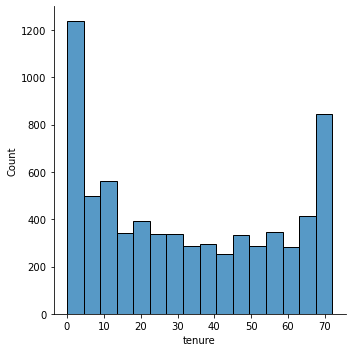

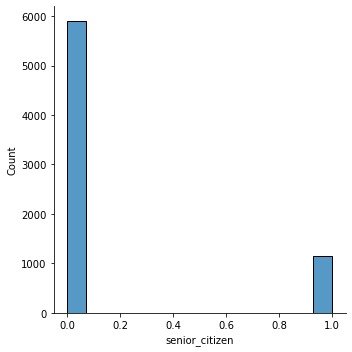

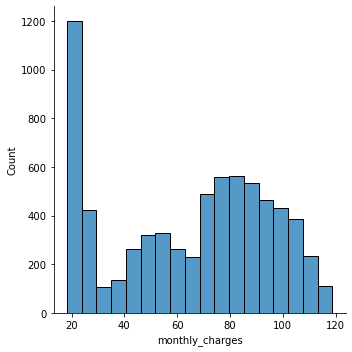

In [19]:
# let's also check the distribution plots of the independent variables
for col in X:
    sns.displot(X[col])
    plt.show()

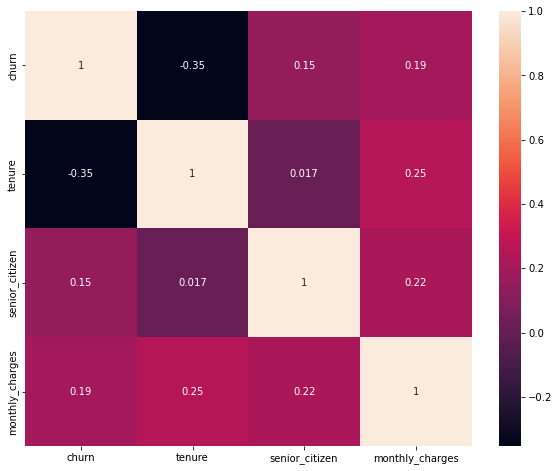

In [20]:
# Let's also check the heatmap-correlation matrix
corr_matrix=df1.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [21]:
# the strongest correlation is between the features tenure and churn = -0,35

In [22]:
# Get model "benchmark"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [23]:
# # Normalizing data: make data range from 0 - 1, instead of from min to max
# # because some of the features has no normal distribution, some features are skewed
# from sklearn.preprocessing import MinMaxScaler
# MinMaxtransformer = MinMaxScaler().fit(X)
# x_normalized = MinMaxtransformer.transform(X)
# print(x_normalized.shape)
# x_normalized = pd.DataFrame(x_normalized,columns=X.columns)
# x_normalized.head()

In [24]:
# scaling using StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,senior_citizen,monthly_charges
0,0.102371,-0.441773,-0.521976
1,-0.711743,-0.441773,0.337478
2,-0.793155,-0.441773,-0.809013
3,-0.263980,-0.441773,0.284384
4,-1.281624,-0.441773,-0.676279


In [25]:
y_train.head()

3738    0
3151    0
4860    0
3867    0
3810    0
Name: churn, dtype: int64

In [26]:
# the transformation has already reset the index for X_train_scaled so we will change the indexes
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [27]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

##  5. Build the logistic regression model

In [28]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# classification = LogisticRegression(random_state=42, max_iter=100000)
# classification.fit(X_train, y_train)

# predictions = classification.predict(X_test)
# print(classification_report(y_test, predictions))

from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=42, max_iter=100000, solver='lbfgs')
classification.fit(X_train_scaled, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.39      0.56      1035
           1       0.36      0.96      0.53       374

    accuracy                           0.54      1409
   macro avg       0.67      0.68      0.54      1409
weighted avg       0.81      0.54      0.55      1409



In [29]:
# checking the score
classification.score(X_test, y_test) 

0.5443577004968062

In [30]:
# to get predictions for our target 'rental_month'
predictions = classification.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [31]:
# the StandardScaler did not give us a good score, let's try Normalizer
scaler = Normalizer()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1035
           1       0.58      0.49      0.53       374

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [32]:
# checking the new score
classification.score(X_test, y_test)
# much better score now

0.7707594038325053

## 6. Evaluate the model.

In [33]:
# constructing the confusion matrix
confusion_matrix(y_test, predictions)

array([[904, 131],
       [192, 182]], dtype=int64)

<AxesSubplot:>

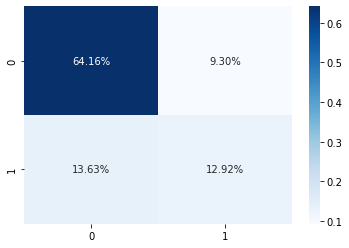

In [34]:
# constructing the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')

<AxesSubplot:>

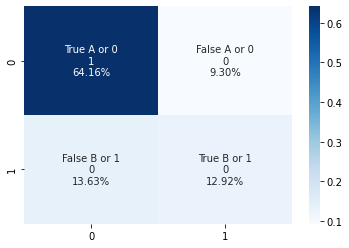

In [35]:
# or constructing the confusion matrix in a better way
group_names = ['True A or 0', 'False A or 0', 'False B or 1', 'True B or 1']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [36]:
# meaning of the confusion matrix

#              Predicted Labels
#                  | 0 - A                | 1 - B
# -------------------------------------------------------------------------------------
# True label 0-A  | True positive (TP)   | False negative (FN)
#            ------------------------------------------------------------------------------
#            1-B | False positive (FP)  | True negative (TN)
#  

# True positive (TP) stands for True Positive which indicates the number of positive examples classified accurately.
# A test result that correctly indicates the presence of a condition or characteristic.
# True negative (TN) shows the number of negative examples classified accurately.
# A test result that correctly indicates the absence of a condition or characteristic.
# False positive (FP) is the number of actual negative examples classified as positive.
# A test result which wrongly indicates that a particular condition or attribute is present.
# False negative (FN) is the number of actual positive examples classified as negative.
# A test result which wrongly indicates that a particular condition or attribute is absent.

In [37]:
# getting precision = TP/(TP+FP), is the ratio of the correctly 0 or 1 labeled by our model to all labeled observations.
# getting recall(aka Sensitivity) = TP/(TP+FN), is the ratio of the correctly 0 or 1 labeled by our model to all observations in general
# getting F1 Score = 2*(Recall * Precision) / (Recall + Precision), the harmonic mean(average) of the precision and recall.
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = classification.predict(X_test_scaled)

print("precision is: ",precision_score(y_test,pred))
print("recall is: ",recall_score(y_test,pred))
print("f1 score is: ",f1_score(y_test,pred))

precision is:  0.44039270687237025
recall is:  0.839572192513369
f1 score is:  0.5777368905243789


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [38]:
# now we have better results
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='lbfgs')
classification.fit(X_train_scaled, y_train)
classification.score(X_test_scaled, y_test)

0.7842441447835344

## 7. Even a simple model will give us more than 70% accuracy. Why?

In [39]:
# The reason is that we have imbalanced data, the observed frequencies are different across the different possible values of a categorical variable. 
# There is majority of observations for the one type and minority for the other.
# It is almost like predicting the fact that a comet will fall to earth in a specific period (a very rare phenomenon),
# if our model predicts almost always that there is no possibility for this fact then the model has a very big percentage of accuracy

## 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [40]:
# Uses K-Nearest Neighbors to create rows with similar features from the minority classes.
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: churn, dtype: int64

In [41]:
# if we use the fake data we have just created, then:
X = pd.get_dummies(df1.drop('churn',axis = 1))
y = df1['churn']

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1035
           1       0.72      0.72      0.72      1035

    accuracy                           0.72      2070
   macro avg       0.72      0.72      0.72      2070
weighted avg       0.72      0.72      0.72      2070



In [42]:
print("the precision is: ",precision_score(y_test,predictions))
print("the recall is: ",recall_score(y_test,predictions))
print("the f1 score is: ",f1_score(y_test,predictions))

the precision is:  0.7170172084130019
the recall is:  0.7246376811594203
the f1 score is:  0.7208073041806823


In [43]:
# there is no improvement from the Normalizer scaler, we have a little bit lower score 0,73 instead of 0,77 in Normalizer scaler

In [44]:
confusion_matrix(y_test, predictions)

array([[739, 296],
       [285, 750]], dtype=int64)

## 9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [45]:
# Tomek Links
# Pairs of almost similar rows from opposite classes (boundary rows).
# Removing the row of the majority class from each pair helps the classifier.
from imblearn.under_sampling import TomekLinks

X = df1.drop('churn',axis = 1)
y = df1['churn']

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

0    4712
1    1869
Name: churn, dtype: int64

In [46]:
# Let's apply Tomek Links technique
X = pd.get_dummies(df1.drop('churn',axis = 1))
y = df1['churn']

X_, y_ = tomek.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42, stratify=y_)

classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))
# f1-score is a little bit better from our two last efforts

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       943
           1       0.65      0.51      0.57       374

    accuracy                           0.78      1317
   macro avg       0.74      0.70      0.71      1317
weighted avg       0.77      0.78      0.77      1317



In [47]:
print("the precision is: ",precision_score(y_test,predictions))
print("the recall is: ",recall_score(y_test,predictions))
print("the f1 score is: ",f1_score(y_test,predictions))

the precision is:  0.6506849315068494
the recall is:  0.5080213903743316
the f1 score is:  0.5705705705705707


In [48]:
# new confusion matrix
confusion_matrix(y_test, predictions)

array([[841, 102],
       [184, 190]], dtype=int64)

In [49]:
# end

In [50]:
# # concatanating fataframes X and the target y
# train = pd.concat([X_train_scaled, y_train],axis=1)
# train.head()

In [51]:
# # defining if we have churn or no
# no_churn = train[train['churn']==0]
# yes_churn = train[train['churn']==1]
# display(no_churn.shape)
# display(yes_churn.shape)

In [52]:
# # oversample minority
# from sklearn.utils import resample

# yes_churn_oversampled = resample(yes_churn, #<- sample from here
#                                     replace=True, #<- we need replacement, since we don't have enough data otherwise
#                                     n_samples = len(no_churn),#<- make both sets the same size
#                                     random_state=0)

In [53]:
# # both sets are now of a reasonable size
# display(no_churn.shape)
# display(yes_churn_oversampled.shape)

In [54]:
# train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
# train_oversampled.head()

In [55]:
# y_train_over = train_oversampled['churn'].copy()
# X_train_over = train_oversampled.drop('churn',axis = 1).copy()

In [56]:
# classification = LogisticRegression(max_iter=1000)
# classification.fit(X_train_over, y_train_over)
# pred = classification.predict(X_test_scaled)

# print("the precision is: ",precision_score(y_test,pred))
# print("the recall is: ",recall_score(y_test,pred))
# print("the f1 score is: ",f1_score(y_test,pred))

In [57]:
# confusion_matrix(y_test,pred)

## 9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [58]:
# no_churn_undersampled = resample(no_churn, #<- downsample from here
#                                     replace=False, #<- no need to reuse data now, we have an abundance
#                                     n_samples = len(yes_churn),
#                                     random_state=0)

In [59]:

# display(yes_churn.shape)
# display(no_churn_undersampled.shape)

In [60]:
# train_undersampled = pd.concat([yes_churn,no_churn_undersampled])
# train_undersampled.head()

In [61]:
# y_train_under = train_undersampled['churn'].copy()
# X_train_under = train_undersampled.drop('churn',axis = 1).copy()

In [62]:
# # no big improvement
# from sklearn.linear_model import LogisticRegression

# classification = LogisticRegression(max_iter=1000)
# classification.fit(X_train_under, y_train_under)
# pred = classification.predict(X_test_scaled)

# print("the precision is: ",precision_score(y_test,pred))
# print("the recall is: ",recall_score(y_test,pred))
# print("the f1 score is: ",f1_score(y_test,pred))

In [63]:
# confusion_matrix(y_test,pred)

In [64]:
# # SMOTE - Synthetic Minority Oversampling Technique

# sm = SMOTE(random_state=100,k_neighbors=50)
# X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [65]:
# X_train_SMOTE.shape

In [66]:
# # we can notice a small improvement with smote
# from sklearn.linear_model import LogisticRegression

# classification = LogisticRegression(max_iter=1000, solver='lbfgs')
# classification.fit(X_train_SMOTE, y_train_SMOTE)
# pred = classification.predict(X_test_scaled)

# print("the precision is: ",precision_score(y_test,pred))
# print("the recall is: ",recall_score(y_test,pred))
# print("the f1 score is: ",f1_score(y_test,pred))

In [67]:
# confusion_matrix(y_test,pred)